<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter_7_Recurrent_Neural_Networks_for_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 7: Recurrent Neural Networks for Natural Language Processing

Chào mọi người nha, tụi mình lại gặp nhau rồi 🌻.
Ở chương này tụi mình sẽ cùng tìm hiểu về việc sử dụng các mạng hồi quy để xử lý các bài toán về ngôn ngữ tự nhiên nha.



![RNN image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Fully_connected_Recurrent_Neural_Network.gif)

###Trước khi bước vào chương mới, tụi mình cùng ôn lại 2 chương trước đó nha.

Ở **Chương 5** mọi người đã được tìm hiểu về việc mã hóa các câu thành dạng chuỗi hay tensor của số thông qua cơ chế **Tokenizer**.

Ở **Chương 6** chúng ta lại tìm hiểu thêm về **vector biểu diễn** hay **cơ chế embedding**, thông qua việc đưa các từ lên không gian cao hơn giúp truy xuất được nhiều ngữ nghĩa hơn, đồng thời xây dựng mối liên kết giữa các vectors đại diện từ có nhóm ngữ nghĩa tương đương nhau.

Tuy nhiên bạn cũng nhận thấy rằng về cơ bản thì các phương pháp trên đều hoạt động dựa giống như **một túi chứa các từ** thôi, không phân biệt về **thứ tự của chữ**. Mà trong ngôn ngữ, **thứ tự** của các từ lại đóng vai trò vô cùng **quan trọng về mặt ngữ nghĩa**.

Ví dụ: Từ **"blue"** đứng một mình nó có vẻ khá thiếu nghĩa, nó có thể là buồn cũng có thể là chỉ màu xanh, cũng giống như từ **"sky"** vậy. Nhưng khi kết hợp lại chúng sẽ lại ăn khớp với nhau đến kì lạ, giờ đây từ **"blue sky"** sẽ có nghĩa là **"bầu trời xanh"**, tính từ đóng vai trò bổ nghĩa cho danh từ. Ngoài ra còn có các từ khác như **"writing desk", "rain cloud"**.

Một ví dụ cụ thể khác như từ **"brain"** và **"storm"**, một từ nghĩa là não, một từ là bão nhưng khi kết hợp lại thành **"brainstorm"**, chúng lại có nghĩa là **động não**. Mọi người sẽ gặp các ví dụ rõ nhất trong các cụm **idioms** khi mà chúng thường mang nghĩa bóng khi ghép các từ lại thay vì nghĩa đen.

Các mô hình thông thường, chúng chỉ biết chúng có những từ đó và đưa lên không gian chiều cao hơn rồi đến các lớp tuyến tính và tính toán thôi, chúng không quan tâm đến yếu tố về mặt **thứ tự, vị trí các từ** nên không mang tính ý nghĩa cao khi xét theo chuỗi.

Mọi người có thể liên tưởng đến trường hợp **antigram** mà trước đó tụi mình có tìm hiểu trong **chương 4**, ở đây cũng tương tự vậy tuy nhiên là ở cấp từ thay vì kí tự.

---

Chính vì những mặt hạn chế ngữ nghĩa trên mà ta cần một phương pháp tiếp cận mới có thể giải quyết được những vấn đề đó, giúp cho mô hình có thể nhìn lại được quá khứ, nhớ lại được những từ phía trước. Và đó cũng là khởi đầu cho **cơ chế hồi quy, tái phát, lặp lại hay nhớ lại (recurrence)** trong kiến trúc của các mô hình sau này.


![RNN image](https://research.aimultiple.com/wp-content/uploads/2021/08/rnn-text.gif)

Trong **chương 7** này, mọi người sẽ tìm hiểu về các phương pháp để có thể hiện thực hóa cơ chế trên nha. Tụi mình sẽ đào sâu hơn về mặt **thông tin ngữ nghĩa của các chuỗi**, cách mà chúng được học cũng như một loại kiến trúc mô hình mới có khả năng hiểu tốt hơn các văn bản. Và đó chính là **Mạng nơ-ron hồi quy - Recurrent neural network (RNN)**

# The Basic of Recurrence.
### Khái niệm cơ bản về cơ chế hồi quy, tái phát, nhớ lại - Recurrence

Trước khi tụi mình đi sâu vào hiểu cách mà **cơ chế hồi quy (Recurrence)** hoạt động, tụi mình sẽ nhìn lại về những **giới hạn** của các mô hình trước đó một lần nữa nha.

Về cơ bản thì mọi thứ vẫn hoạt động theo kiểu bạn có dữ liệu này, bạn có nhãn của chúng này và rồi chúng ta đẩy tất cả vào mô hình, ép chúng học và tìm ra được **các quy luật bên trong**. Sau đó chúng ta sẽ sử dụng những quy luật có được hay còn được gọi là trọng số của mô hình để dự đoán các dữ liệu sau này.

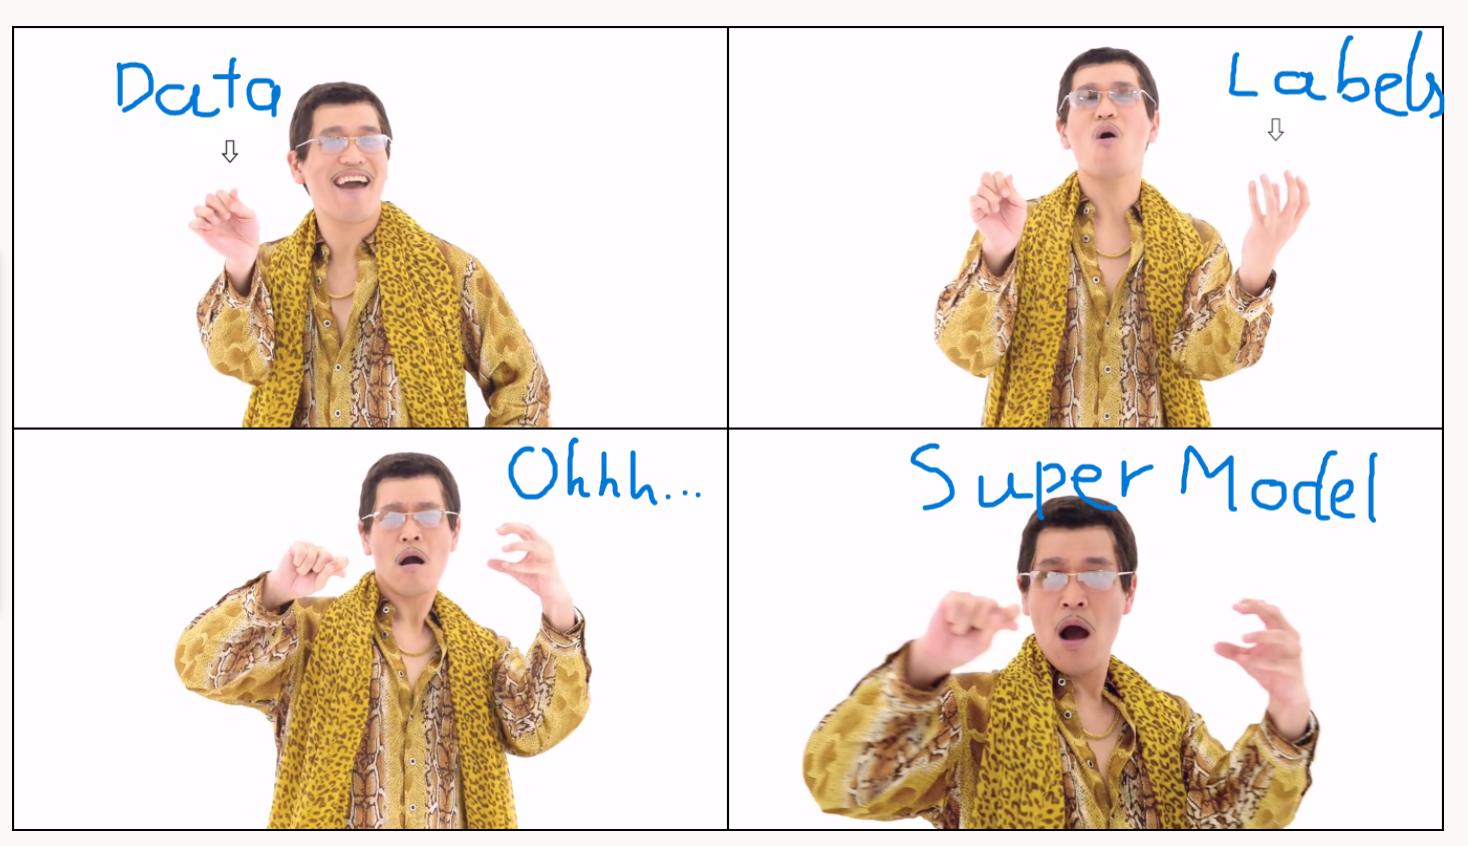

Tuy nhiên mọi người có thể thấy dữ liệu được đưa vào và xử lý một cách tổng thể, chúng không cố gắng tìm kiếm các chi tiết liên quan hay trình tự xuất hiện của dữ liệu. Điều này phần nào làm cho mô hình bị **"ngu"**!

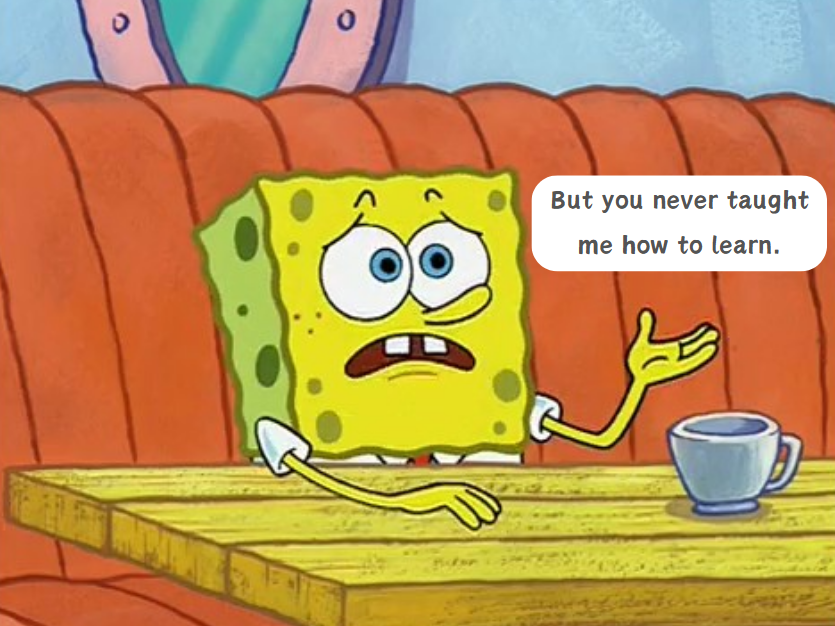

Mình sẽ lấy ví dụ một số trường hợp cụ thể về sự **"ngu"** của nó nha.
Nếu bạn đưa 2 câu như sau:
> Today I am **blue**, because the **sky** is gray.

and

> Today I am happy, and there's a beautiful **blue sky**.

Đối với chúng ta sẽ hiểu ngay nhưng với mô hình lại khác. Chúng sẽ không hiểu được được từ **"blue"** ở trong 2 câu này có nghĩa khác nhau như thế nào đâu, khi mà ở câu đầu thì có nghĩa là **"buồn"** nhưng ở câu sau lại có nghĩa là **"màu xanh"**.

Chúng chỉ hiểu đơn giản là 2 câu trên đều có từ "blue" và "sky" vậy là chúng tương tự và có ý nghĩa gần giống nhau trên không gian vector biểu diễn.

> **Vậy làm thế nào để chúng có thể khôn ra được?**

Đó là cho chúng hiểu và nắm bắt được thứ tự các từ kết hợp với nhau. Mà để làm được việc này, chúng ta cần mô hình nhớ lại được kiến thức trước đó. Và đây cũng là nền tảng chính cho việc xử lý các dữ liệu có cấu trúc dạng chuỗi.

Chắc mọi người ai cũng gặp qua cụm **"hồi quy tiền kiếp"** rồi ha. Nói đơn giản thì hồi quy có nghĩa là **"nhớ lại"** nhưng mà nói cho nó sang hơn =))

Bây giờ tụi mình mới chính thức đi vào tìm hiểu bản chất của cơ chế hồi quy, qua đó hiểu được cách thức hoạt động của mạng **RNN** nha.

Tụi mình sẽ lấy ví dụ đơn giản về **dãy Fibonacci nha**, đây là một dạng cơ bản của chuỗi tuần tự khi mà số phía sau bằng hai số trước cộng lại, do đó chúng có mối quan hệ mật thiết về mặt trình tự theo thời gian.

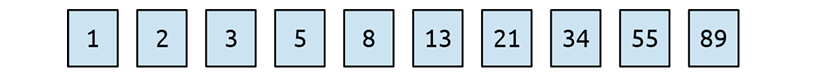

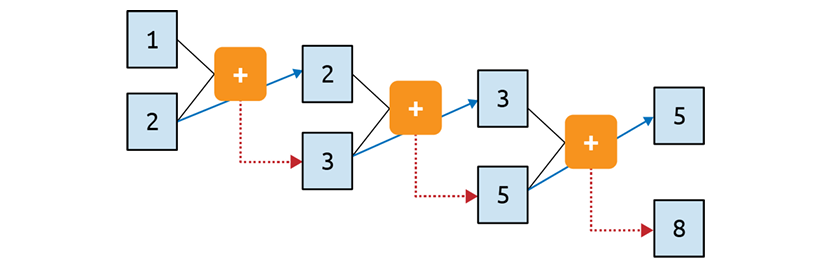

Ý tưởng của mạng hồi quy - RNN cũng sẽ hoạt động tương tự như vậy nha.

Ở đây mình định nghĩa mỗi ô cộng màu cam sẽ đại diện cho phép tính toán tại mỗi trạng thái thời gian. Vậy là ta có tổng cộng 3 trạng thái thời gian.

***Mọi người nhớ kĩ giúp mình đoạn này nha!***

Ở trạng thái thứ nhất, mô hình sẽ lấy dữ liệu khởi đầu và tính ra output của trạng thái 1. Tiếp đến sang phép tính ở trạng thái thứ 2, mô hình lấy dữ liệu tiếp theo là số 2 và kết hợp với output ở trạng thái 1 là 3, kết quả output ở trạng thái là 5, tương tự như vậy ở trạng thái thứ 3 cũng vậy.

Trải qua quá trình trên thì khi đến trạng thái cuối cùng, **kết quả đầu ra của tụi mình sẽ có sự đóng góp ý nghĩa của các kết quả, trạng thái trước đó** trong chuỗi từ đó có thể nắm bắt được ý nghĩa của toàn bộ chuỗi.

Dưới này là hình vẽ thu nhỏ, tóm tắt lại sơ đồ quá trình đó nha.


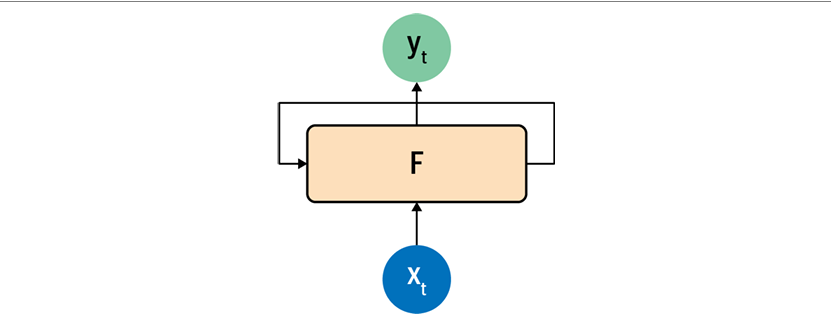

Ta gọi **F** là quá trình tính toán của mô hình tại mỗi thời điểm. **t**  đại diện cho thời điểm xảy ra phép toán. **X** là dữ liệu đầu vào và **y** là kết quả đầu ra.
Tại mỗi thời điểm **t**, mô hình sẽ nhận dữ liệu đầu vào là **x(t)**, sau đó tinh ra kết quả là **y(t)**, đồng thời kết quả đó lại được đưa vào tổng hợp chung với dữ liệu ở phép toán trạng thái thời gian tiếp theo **(t+1)**. Chúng cứ cộng liên tục dữ liệu trong quá khứ như vậy cho đến khi hết chuỗi thì thôi.

Dưới đây là hình ảnh phân rã quá trình trên để mọi người hiểu rõ hơn nha.

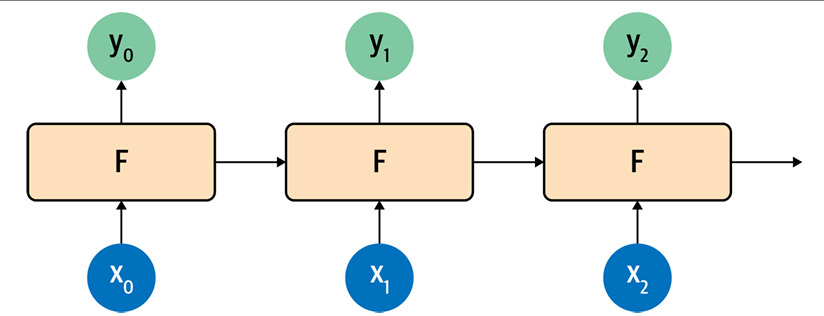

Thực hiện tính toán kết quả tại thời điểm 0, trả về kết quả rồi lại đưa tiếp vào tổng hợp chung với tính toán tại thời điểm 1, và lại tiếp tục như vậy với thời điểm 2 và về sau.

*Lưu ý: mình chỉ dùng dãy số Fibonacci để mọi người có thể dễ hiểu và mường tượng và cách mà kiến trúc mạng hồi quy - RNN hoạt động. Còn về chi tiết thì phép toán mà mô hình thực hiện bên trong sẽ phức tạp hơn nhiều.*

#Extending Recurrence for Language
### Tụi mình sẽ mở rộng tìm hiểu về tính hồi quy trong xử lý ngôn ngữ tự nhiên nha.